In [1]:
# Imports
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
S0, S0_ = 100, 100 # initial value
r = 0.05  # constant short rate
sigma = 0.25  # constant volatility
T = 2.0  # time in years
M = 50 # maturity
I = 10000  # number of random draws

dt = T / M
S_1 = np.zeros((M + 1, I))
S_2 = np.zeros((M + 1, I))

S_1[0] = S0
S_2[0] = S0_

for t in range(1, M + 1):
    S_1[t] = S_1[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))
    S_2[t] = S_2[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))

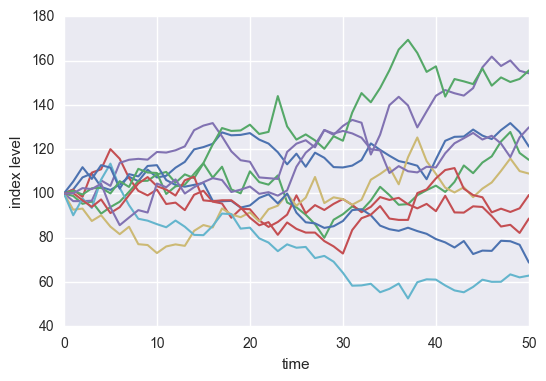

In [3]:
plt.plot(S_1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
# tag: gbm_dt_paths
# title: Simulated geometric Brownian motion paths
# size: 60

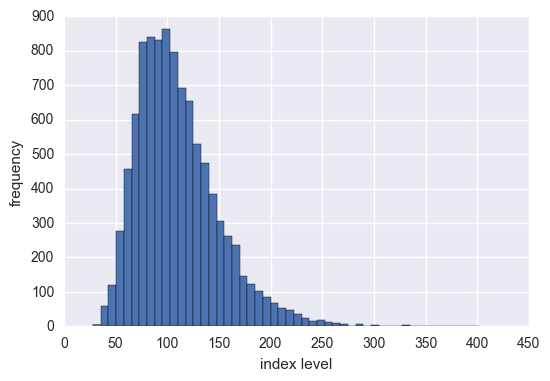

In [4]:
plt.hist(S_1[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)
# tag: gbm_dt_hist
# title: Simulated geometric Brownian motion at maturity
# size: 60

In [5]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)


iv = (strike - 100) ** 2 / (100 * strike) / ttm
  # generate fake implied volatilities

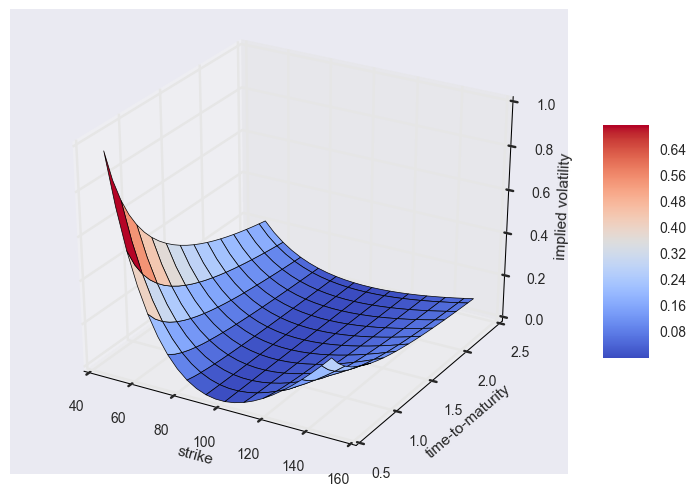

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')

fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: matplotlib_17
# title: 3d surface plot for (fake) implied volatilities
# size: 70

In [7]:
# Data simulation
S0, S0_ = 100, 100 # initial value
r = 0.05  # constant short rate
sigma = 0.25  # constant volatility
T = 2.0  # time in years
M = 50 # maturity
I = 10000  # number of random draws

dt = T / M
S_1 = np.zeros((M + 1, I))
S_2 = np.zeros((M + 1, I))

S_1[0] = S0
S_2[0] = S0_

for t in range(1, M + 1):
    S_1[t] = S_1[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))
    S_2[t] = S_2[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))

S_12 = S_1 / S_2

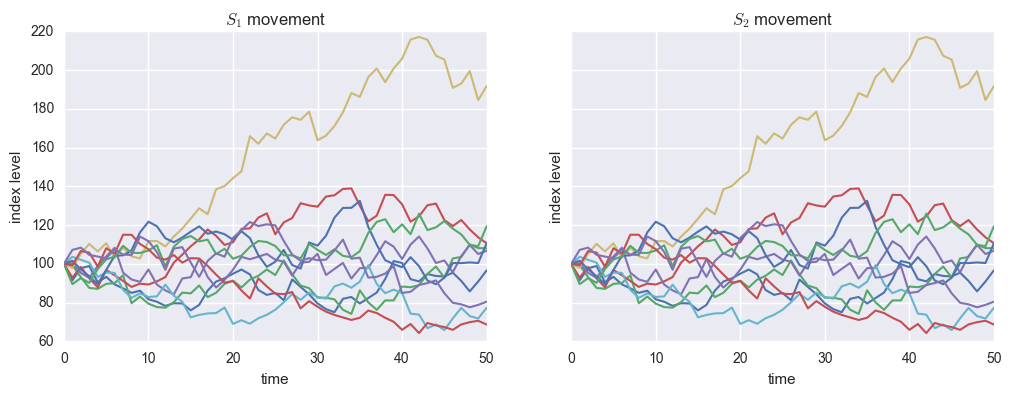

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(12, 4)

ax1.plot(S_1[:, :10], lw=1.5)
ax1.set_xlabel('time')
ax1.set_ylabel('index level')
ax1.set_title('$S_1$ movement')
ax1.grid(True)

ax2.plot(S_1[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('index level')
ax2.set_title('$S_2$ movement')
ax2.grid(True)

In [9]:
# (1)
k = 1
sigma_12 = 0.5
rho = (sigma**2 + sigma**2 - sigma_12**2) / (2 * sigma * sigma)
a = sigma**2 + sigma**2 
b = -2*sigma*sigma

N = 10
grilha = np.linspace(0,100, N)

def delta(x):
    return x**2 < 0.01
ind = 0
Enum = np.zeros((N, M+1))
Eden = np.zeros((N, M+1))
f = np.zeros((N, M+1))
for p in grilha:
    Enum[ind] = np.sum((S_2*(sigma**2 + sigma**2 + 2*(a/b)*sigma*sigma)) * delta(S_1/S_2 - p), axis = 1)/np.sum(S_2 * delta(S_1/S_2 - p), axis = 1)
    Eden[ind] = np.sum((S_2*(sigma*sigma)/b) * delta(S_1/S_2 - p), axis = 1)/np.sum(S_2 * delta(S_1/S_2 - p), axis = 1)
    f[ind] = (Enum[ind] - sigma_12**2)/(2*Eden[ind])
    ind+=1

#rho_ = (1/b)*(f - a)

In [10]:
Enum.shape

(10, 51)

In [11]:
plt.plot(rho_)

NameError: name 'rho_' is not defined

In [ ]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()